<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/9_1_RecurrentNeuralNetwork_IMDBReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Sequential data 순차 데이터***

Time series data 시계열 데이터 or 텍스트같이 순서에 의미가 있는 데이터를 말함. I am a boy >> boy am a I 의미 안됨.


일별 온도를 기록한 데이터, 순서 바뀌면 무용지물.


텍스트 데이터는 단어의 순서가 중요한 순차 데이터!!!!

순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요.

***Feedforward neural network FFNN***

하나의 샘플을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않는다.

Every neural net we have learned before is FFNN.



***Recurrent Neural Network RNN 순환 신경망***

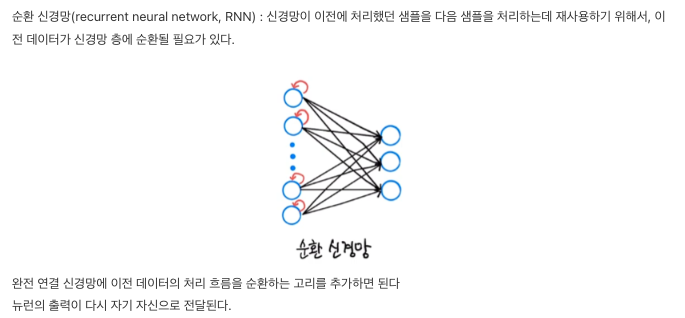

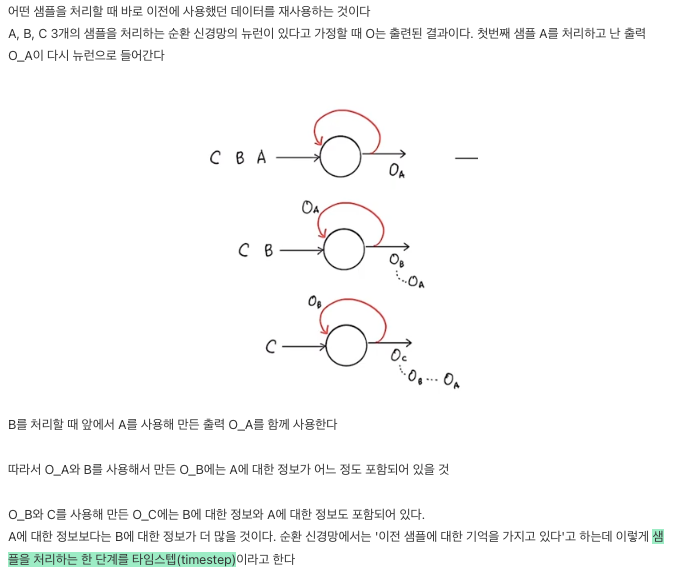

***Cell***

순환 신경망에서는 층을 셀이라고 부름. 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현.

셀을 출력을 **hidden state 은닉 상태**라고 부름. 신경망의 기본 구조는 같음. 하지만 달라지는 것은ㅇ 층의 출력을 다음 타음 스텝에 재사용.

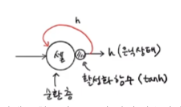

은닉층의 활성화 함수로는 ***hyperbolic tangent (tanh)*** 주로 사용. 시그모이드함수와 같이 생겼으나, 범위는 -1부터 1. 순환 신경망에도 활성화 함수는 꼭 필요.

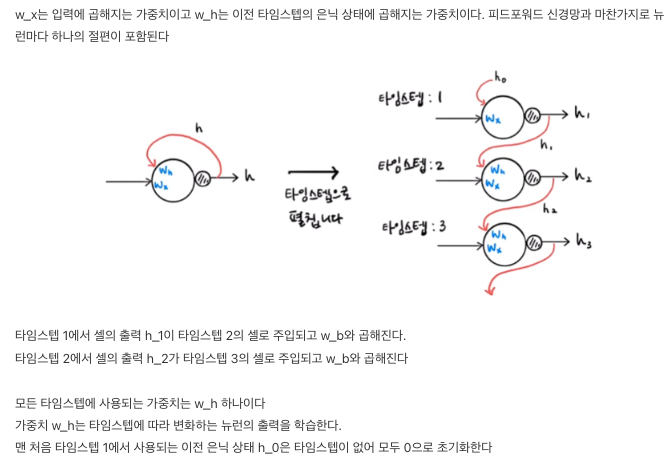

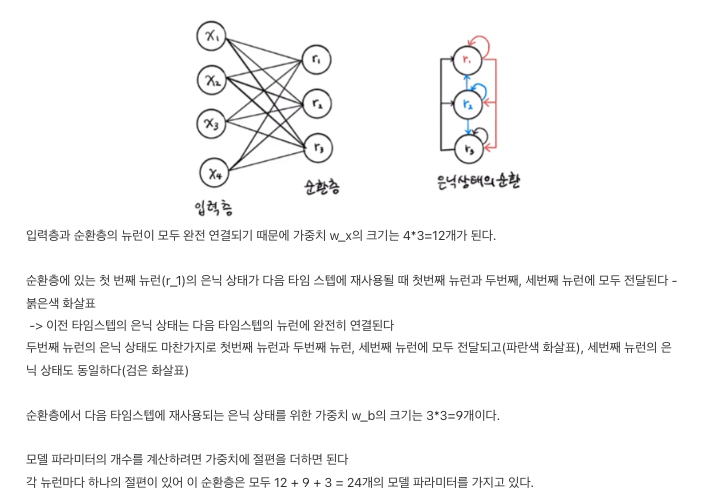

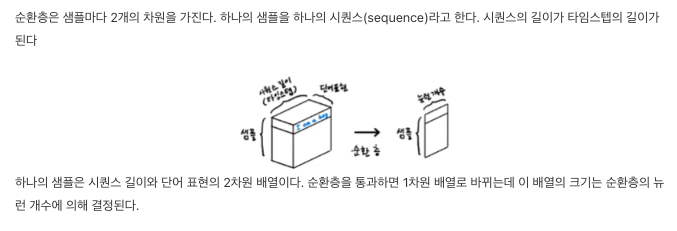

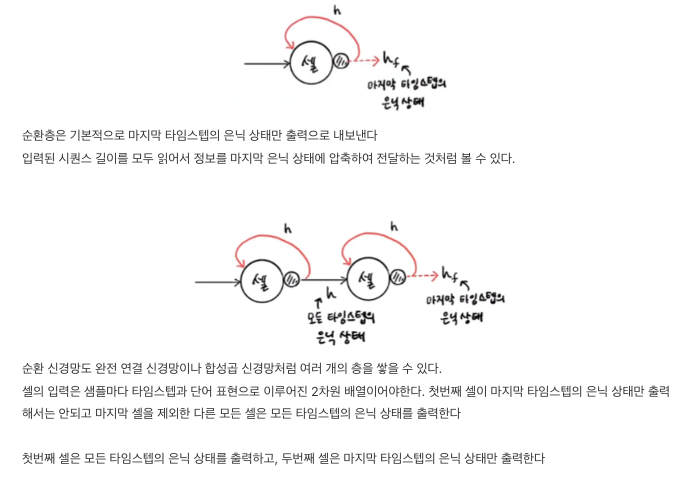

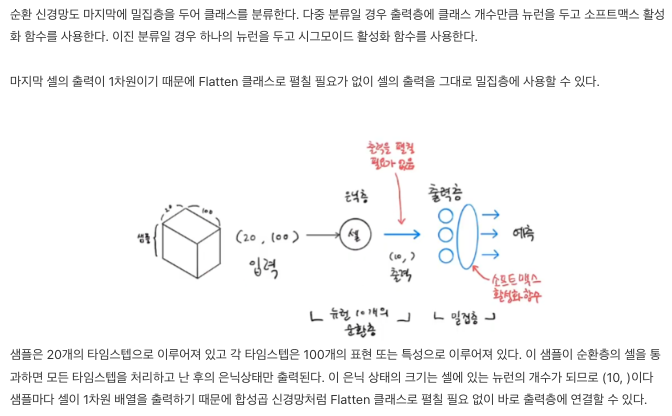

***Natrual Language Processing, NLP 자연어 처리***

***Corpus 말뭉치(훈련 데이터)***

텍스트를 숫자로. 단어마다 고유한 정수를 부여. He >> 10 the >> 12....

정숫값 사이에는 어떤 관계도 없음. 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리. >> 분리된 단어 **token**

하나의 샘플은 여러 개의 토큰으로. 1개의 토큰이 하나의 타임스텝.

0은 패딩, 1은 문장으 ㅣ시작, 2는 어휘 사전에 없는 토큰.

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)
#50,000개의 샘플. 25000개는 긍정적 리뷰. 25000개는 부정적 리뷰. num_words = 300 전체 데이터셋에서 가장 자주 등장하는 단어 300개(어휘사전에 있음)만 사용.

In [ ]:
print(train_input.shape, test_input.shape)

#1차원
#train_input : [review1, review2, review3, ...] numpy list

(25000,) (25000,)


In [ ]:
print(len(train_input[0])) #218개의 토큰

218


In [ ]:
print(len(train_input[1]))

189


In [ ]:
print(train_input[0]) #첫번째 리뷰에 담긴 글자들. 이미 리뷰가 정수로 변환되어 있다.
#어휘 사전에 없는 단어는 모두 2로 표시.
#imdb.load_data() 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장 많이 등장한 300개.

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20]) #부정 0 #긍정 1

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


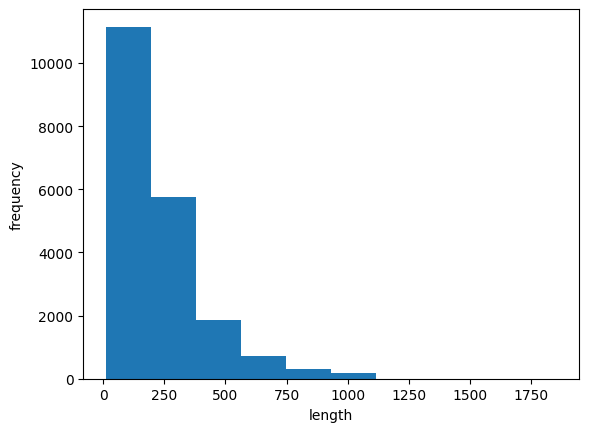

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
#대부분 길이가 100단어 이거나 미만으로, 100개의 단어만 사용.
#패딩이 필요. 패딩을 나타내는 토큰은 0.
#100 보다 긴  경우는 잘라내고 짧은 경우는 0으로 패딩.

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [ ]:
print(train_input[0][-10:]) #train_seq[0]과 일치.
#샘플의 앞부분이 잘림.
#일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문.
#뒷부분을 자르고 싶다면.
#pad_sequence() 함수의 truncating 매개변수의 값을 기본값인 'pre'가 아닌 'post'로 바꾸면 됨.

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [ ]:
print(train_seq[5])
#패딩 토큰은 시퀀스의 뒷부분이 아니라 앞부분.

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300))) #가장 간단한 순환층 클래스
#입력차원 (100, 300)
#뉴런의 개수 8
#기본 activation = 'tanh'

model.add(keras.layers.Dense(1, activation='sigmoid'))

토큰을 정수로 변환할때, 큰 정수가 큰 활성화 출력을 만듬. 10번 토큰보다 20번 토큰을 더 중요시 할 이유가 없음!!!!


정숫값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하는 방법. **원-핫 인코딩** 7장에서 소개.

10을 원-핫 인코딩으로 바꾸면, 0000000000010....0

imdb.load_data() 함수에서 300개의 단어만 사용하도록 지정했기때문에, 고유한 단어는 모두 300개. 0~299. 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 300이어야 함.

In [ ]:
train_oh = keras.utils.to_categorical(train_seq) #train_seq를 원-핫 인코딩으로 변환.
val_oh = keras.utils.to_categorical(val_seq)
print(train_oh.shape)

(20000, 100, 300)


In [ ]:
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 8)                 2472      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 22ms/step - loss: 0.6980 - accuracy: 0.5005 - val_loss: 0.6960 - val_accuracy: 0.5024
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6946 - accuracy: 0.5097 - val_loss: 0.6918 - val_accuracy: 0.5258
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6870 - accuracy: 0.5449 - val_loss: 0.6813 - val_accuracy: 0.5722
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6768 - accuracy: 0.5878 - val_loss: 0.6730 - val_accuracy: 0.5972
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6672 - accuracy: 0.6150 - val_loss: 0.6655 - val_accuracy: 0.6100
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6578 - accuracy: 0.6334 - val_loss: 0.6544 - val_accuracy: 0.6314
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6474 - accuracy: 0.6515 - val_loss: 0.6436 - val_accuracy:

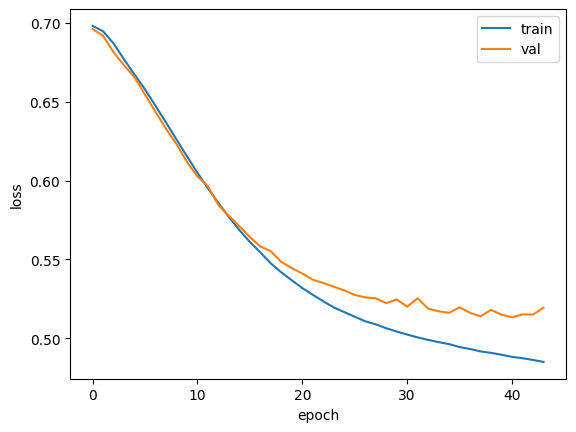

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
print(train_seq.nbytes, train_oh.nbytes)
#원-핫 인코딩의 단점. 입ㅈ력 데이터 엄청 커짐.

8000000 2400000000


***Word Embedding 단어 임배딩***

각 단어를 고정된 크기의 실수 백터로 바꾸어 줌.

cat >> 0.2,0.1,1.3,0.8,0.2,0.4,1.1,0.9,0.2,0.1

이런 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있기 때문에 자연어 처리에서 더 좋은 성능 내는 경우 많음.

keras.layers의 Embedding클래스로 임베딩 기능 제공. 입력으로 정수 데이터를 받기때문에, 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 train_seq 사용가능. 메모리 훨씬 효율적.

임베딩도 (100,)크기의 샘플을 (100, 20)과 같이 2차원 배열로 늘림.

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100)) #300 어휘사전의 크기 #16은 임베딩 벡터의 크기.
#100 입력 시퀀스의 길이.
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           4800      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6867 - accuracy: 0.5500 - val_loss: 0.6800 - val_accuracy: 0.5848
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6695 - accuracy: 0.6202 - val_loss: 0.6643 - val_accuracy: 0.6338
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6507 - accuracy: 0.6649 - val_loss: 0.6441 - val_accuracy: 0.6744
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6303 - accuracy: 0.6996 - val_loss: 0.6262 - val_accuracy: 0.6956
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6143 - accuracy: 0.7147 - val_loss: 0.6122 - val_accuracy: 0.7062
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6004 - accuracy: 0.7256 - val_loss: 0.6014 - val_accuracy: 0.7162
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5884 - accuracy: 0.7339 - val_loss: 0.5914 - val_accuracy:

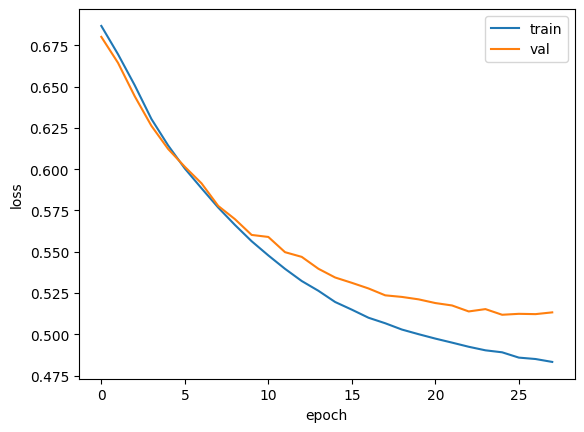

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()